<a href="https://colab.research.google.com/github/H3nr1que26/Pedro/blob/main/Atividade_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nesta atividade utilizaremos conceitos de inteligencia artificial, afim de realizar uma analise de um conjunto de dados com o intuito de criar modelos que sejão capazes de predizer corretamente os resultados que se desejam obter.

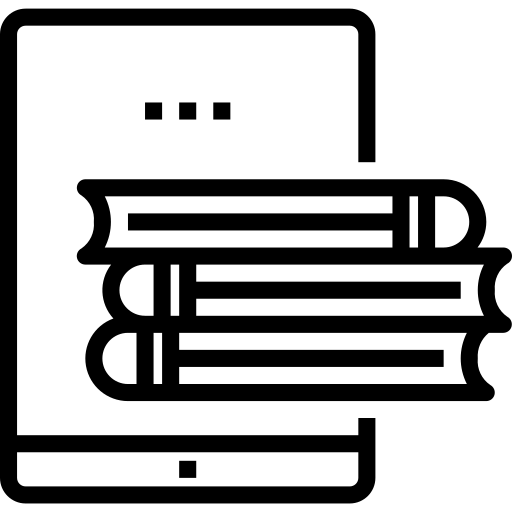



Para que seja possivel a criação deses modelos e necessario que certas bibliotecas seja importadas, pois são elas que disponibilizarão as ferramentas que serão utilizadas

In [2]:
import warnings
warnings.filterwarnings("ignore")


import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

import math
from math import sqrt, pi, exp
from scipy.stats import norm


import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import plot_roc_curve

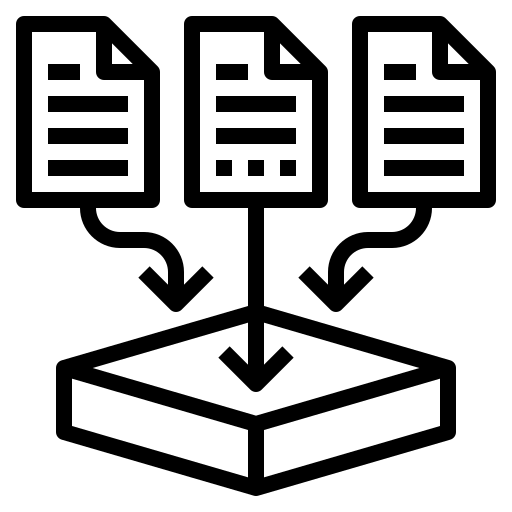


O passo segunite e importar os dados para o ambientte onde ele sera devidamente tratado e onde sera possível termos uma visão mas clara sobre como os dados estão distribuidos, se há espaços em branco ou colunas que necessitem de trabsformação.

In [ ]:
arquivo = 'https://raw.githubusercontent.com/H3nr1que26/Pedro/main/women_clothing_ecommerce_sales.csv'
dados = pd.read_csv(arquivo)
dados.head()

In [ ]:
dados.info()

In [5]:
dados.shape

(527, 8)

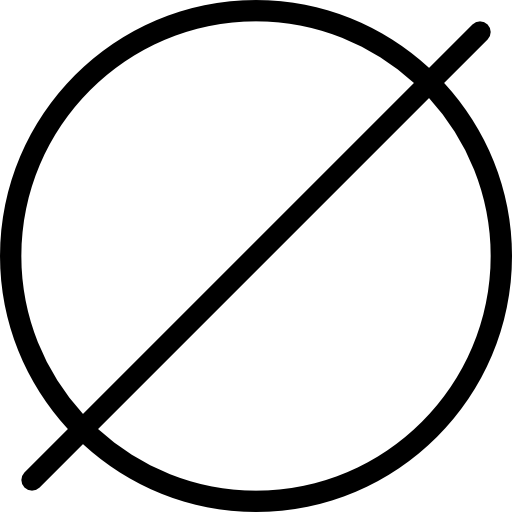

A ausência de dados e um fator importante que deve ser tartado assimque identificado, pois lacunas comprometem a eficiência do modelo, causando erros e baixo índice de acertos 

In [ ]:
dados.isna().sum().to_frame('Valor Vazio')

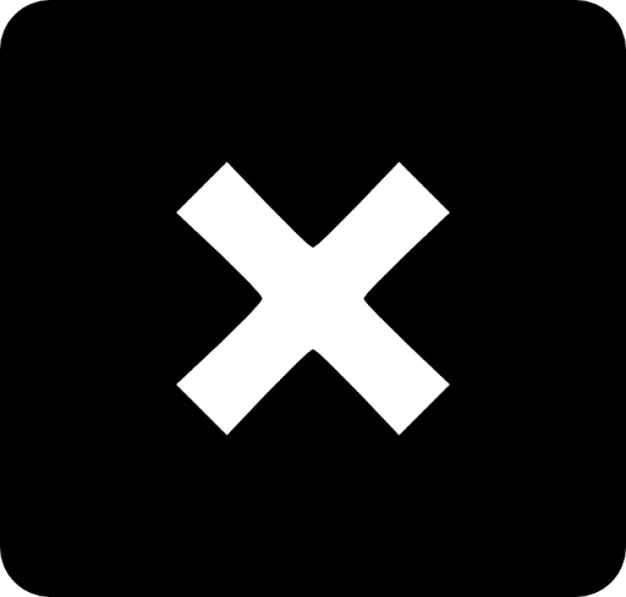

Em certsos cassos no proceso de análise percebe-se que certas colunas não tem uma improtância muito grande para o comjunto podem ser excluidas com o intuito de facilitar a aplicação dos modelos de predição.

In [ ]:
dados = dados.drop(columns = ['order_date','order_id'])

dados.head()

In [ ]:
dados.info()

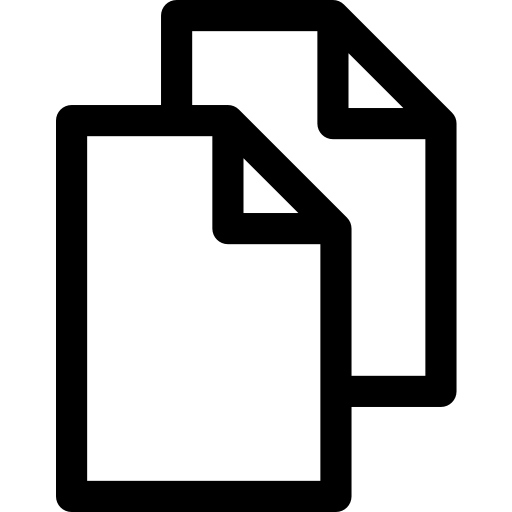


Essa parte consistem em buscar entre os conjuntos de dados classes que se repetem, é a partir dessas classes que avaliamos a possibilidade de transformação de colunas, para que fique compatível com os modelos que serão utilizados.

In [ ]:
sku = dados['sku'].drop_duplicates()


sku

In [ ]:
color = dados['color'].drop_duplicates()


color

In [ ]:
size = dados['size'].drop_duplicates()


size

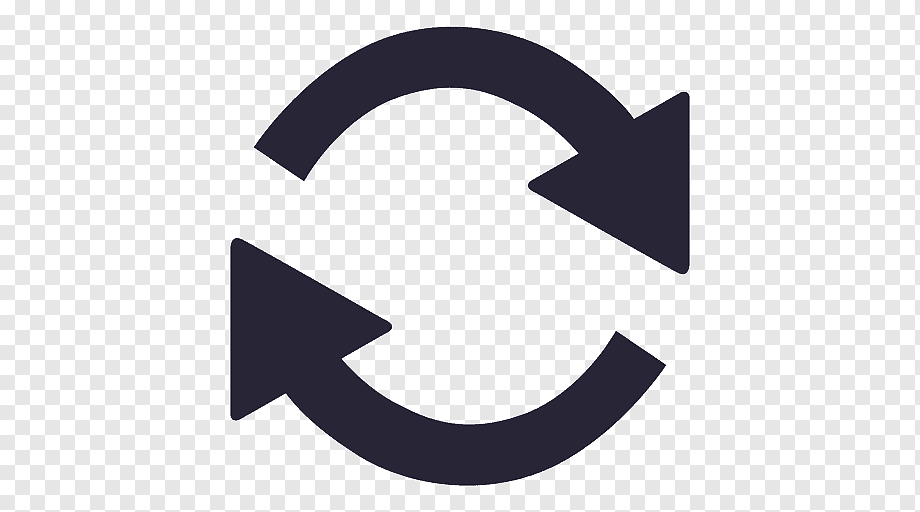


Havendo a necessidades transformamos as colunas para que seus dados possam se encaixar nos modelos de predição que serão utilizados.

In [ ]:

dados = pd.get_dummies(dados,columns=['sku'])

dados.head()

In [ ]:

dados = pd.get_dummies(dados,columns=['color'])

dados.head()

In [ ]:
dados = pd.get_dummies(dados,columns=['size'])

dados.head()

In [ ]:
dados

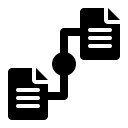


Anáçise de correlação utilizada para que possa de avaliar o grau interferncia entre os dados

In [16]:
def color_corr ( value_str ):
  try:
    value = float(value_str)
    if value >= 0.6 or value <= -0.6:
      color = 'red'
    else:
      color = 'black'
  except:
          color = 'black'
  return 'color: %s' % color

In [ ]:
dados.corr().style.applymap(color_corr)

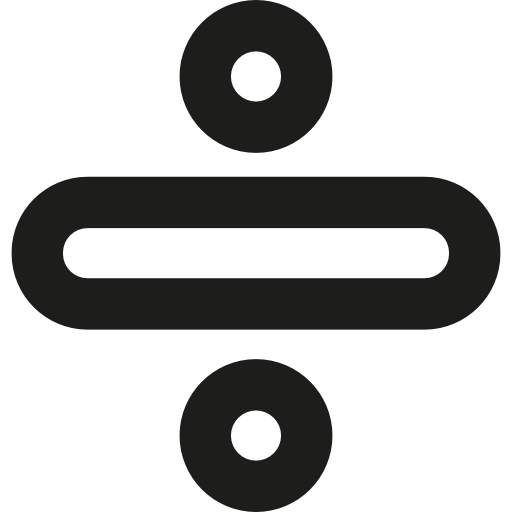


Neste passo dividimimos nossos dados entre o nosso ojetivo como resposta final e os dados que serão uasados de parametro para predizer o resultado, a separação se da entre treino e teste

In [18]:
objetivo = 'revenue'



In [ ]:
X = dados.drop( columns = [objetivo], axis = 1 )
X

In [ ]:
y = dados[objetivo]
y

In [31]:
X_train, X_test, y_train, y_test = train_test_split ( X, y, test_size = 0.6, random_state = 42 )

In [ ]:
X_train

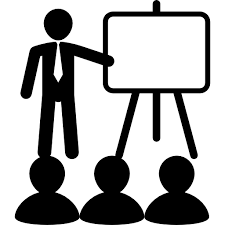


Com os dados seprarodos e tratados podemos aplicar os modelos de predição, que consiste em aplicar algoritimos de aprendizagem de máquina 

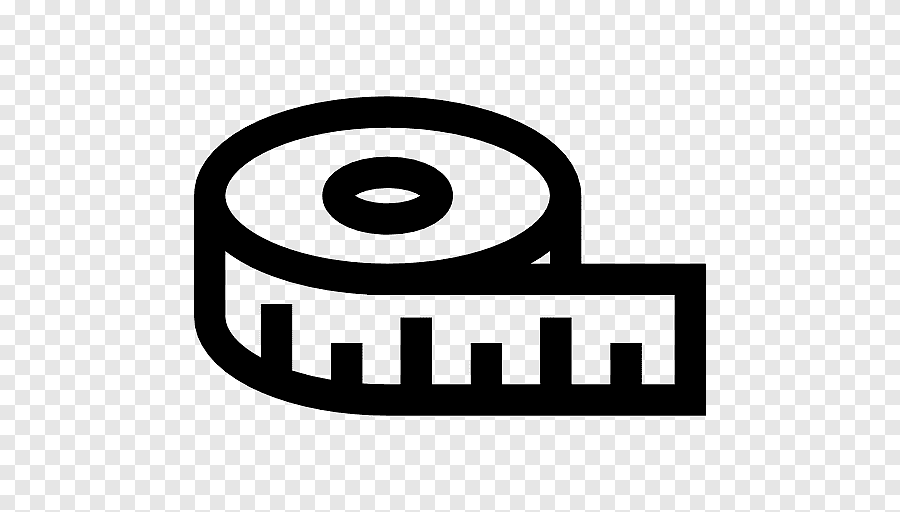

 Aliado a esse algoritmos kutilizamos ferramentas que nos ajudão a avaliar o nível de eficiência de cada algoritimo, para que possamos escolher o que melhor se encaixa em noso objetivos final

In [33]:
LR = LinearRegression().fit(X_train, y_train)

In [ ]:
print("Acc Treino:", LR.score(X_train, y_train))
print("Acc Teste:", LR.score(X_test, y_test))

In [ ]:
y_predito = LR.predict(X_test)
y_predito

In [ ]:
plt.scatter(y_test, y_predito)
plt.xlabel('Valor Calculado')
plt.ylabel('Valor Predito')
z = np.polyfit(y_test, y_predito, 1)
p = np.poly1d(z)
plt.plot(y_test, p(y_test), "r-")
plt.show();

In [ ]:
saida = X.copy()
saida['real'] = y.copy()
saida['predito LR'] = LR.predict(X)
saida['AE'] = np.absolute(saida['real'] - saida['predito LR']) 
saida['MAE'] = metrics.mean_absolute_error(saida['real'], saida['predito LR']) 
saida['MSE'] = metrics.mean_squared_error(saida['real'], saida['predito LR']) 
saida['RMSE'] = np.sqrt(metrics.mean_squared_error(saida['real'], saida['predito LR'])) 
saida['real std'] = np.std(saida['real']) 
saida['predito LR std'] = np.std(saida['predito LR']) 
saida['r2 score'] = metrics.r2_score(saida['real'], saida['predito LR']) 
saida.sort_values(by=['AE'],ascending=False) 

In [28]:
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size = 0.7, random_state=42)

In [29]:
LR  = LogisticRegression(solver='lbfgs', max_iter=1000).fit(train_x, train_y)
LDA = LinearDiscriminantAnalysis().fit(train_x, train_y)
DT  = DecisionTreeClassifier().fit(train_x, train_y)
KN  = KNeighborsClassifier().fit(train_x, train_y)
SVM = SVC().fit(train_x,train_y) 
RF  = RandomForestClassifier().fit(train_x,train_y)

In [ ]:
print("Acurácia LR:", LR.score(test_x,test_y), "\n")
print("Acurácia LDA:", LDA.score(test_x,test_y), "\n")
print("Acurácia DT:", DT.score(test_x,test_y), "\n")
print("Acurácia KN:", KN.score(test_x,test_y), "\n")
print("Acurácia SVM:", SVM.score(test_x,test_y), "\n")
print("Acurácia RF:", RF.score(test_x,test_y), "\n")

**Conclusão**

Com os algoritmos aplicados e devidamente testados já podemos ter  uma visão mais clara sobre qual o melhor para essa análise em espefico. 



In [ ]:
saida = X.copy()
saida['real'] = y.copy()
saida['predito LR'] = LR.predict(X)
saida['AE'] = np.absolute(saida['real'] - saida['predito LR']) 
saida['MAE'] = metrics.mean_absolute_error(saida['real'], saida['predito LR']) 
saida['MSE'] = metrics.mean_squared_error(saida['real'], saida['predito LR']) 
saida['RMSE'] = np.sqrt(metrics.mean_squared_error(saida['real'], saida['predito LR'])) 
saida['real std'] = np.std(saida['real']) 
saida['predito LR std'] = np.std(saida['predito LR']) 
saida['r2 score'] = metrics.r2_score(saida['real'], saida['predito LR']) 
saida.sort_values(by=['AE'],ascending=False) 






In [ ]:
print("Acurácia LR:", LR.score(test_x,test_y), "\n")
print("Acurácia LDA:", LDA.score(test_x,test_y), "\n")
print("Acurácia DT:", DT.score(test_x,test_y), "\n")
print("Acurácia KN:", KN.score(test_x,test_y), "\n")
print("Acurácia SVM:", SVM.score(test_x,test_y), "\n")
print("Acurácia RF:", RF.score(test_x,test_y), "\n")